In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
from skimage import io
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


data = files.upload()

Saving vaccinations.csv to vaccinations.csv


In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('vaccinations.csv')

df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121080,Zimbabwe,ZWE,2022-07-27,12168972.0,6370434.0,4688789.0,1109749.0,11550.0,9567.0,76.09,39.83,29.32,6.94,598.0,2711.0,0.017
121081,Zimbabwe,ZWE,2022-07-28,12173026.0,6371959.0,4690254.0,1110813.0,4054.0,7150.0,76.11,39.84,29.33,6.95,447.0,2122.0,0.013
121082,Zimbabwe,ZWE,2022-07-29,12175457.0,6372686.0,4691111.0,1111660.0,2431.0,5261.0,76.13,39.85,29.33,6.95,329.0,1950.0,0.012
121083,Zimbabwe,ZWE,2022-07-30,12180877.0,6375973.0,4691667.0,1113237.0,5420.0,5603.0,76.16,39.87,29.33,6.96,350.0,2130.0,0.013


In [ ]:
print(df.columns)

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')


In [ ]:
## print(df['iso_code'][0:200])
print(df['location'])

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
121080       Zimbabwe
121081       Zimbabwe
121082       Zimbabwe
121083       Zimbabwe
121084       Zimbabwe
Name: location, Length: 121085, dtype: object


In [ ]:
df2 = pd.read_csv('vaccinations.csv', parse_dates=['date'])


In [ ]:
df2

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121080,Zimbabwe,ZWE,2022-07-27,12168972.0,6370434.0,4688789.0,1109749.0,11550.0,9567.0,76.09,39.83,29.32,6.94,598.0,2711.0,0.017
121081,Zimbabwe,ZWE,2022-07-28,12173026.0,6371959.0,4690254.0,1110813.0,4054.0,7150.0,76.11,39.84,29.33,6.95,447.0,2122.0,0.013
121082,Zimbabwe,ZWE,2022-07-29,12175457.0,6372686.0,4691111.0,1111660.0,2431.0,5261.0,76.13,39.85,29.33,6.95,329.0,1950.0,0.012
121083,Zimbabwe,ZWE,2022-07-30,12180877.0,6375973.0,4691667.0,1113237.0,5420.0,5603.0,76.16,39.87,29.33,6.96,350.0,2130.0,0.013


In [ ]:
df2.dtypes

location                                       object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
total_boosters                                float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
total_boosters_per_hundred                    float64
daily_vaccinations_per_million                float64
daily_people_vaccinated                       float64
daily_people_vaccinated_per_hundred           float64
dtype: object

In [ ]:
df2.axes

In [ ]:
df2.size

1937360

In [ ]:
df2.ndim

2

In [ ]:
df2.shape

(121085, 16)

In [ ]:
df2.axes[0]

RangeIndex(start=0, stop=121085, step=1)

In [ ]:
df2.shape[1]

16

In [ ]:
df2.values

array([['Afghanistan', 'AFG', Timestamp('2021-02-22 00:00:00'), ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', Timestamp('2021-02-23 00:00:00'), ...,
        34.0, 1367.0, 0.003],
       ['Afghanistan', 'AFG', Timestamp('2021-02-24 00:00:00'), ...,
        34.0, 1367.0, 0.003],
       ...,
       ['Zimbabwe', 'ZWE', Timestamp('2022-07-29 00:00:00'), ..., 329.0,
        1950.0, 0.012],
       ['Zimbabwe', 'ZWE', Timestamp('2022-07-30 00:00:00'), ..., 350.0,
        2130.0, 0.013],
       ['Zimbabwe', 'ZWE', Timestamp('2022-07-31 00:00:00'), ..., 310.0,
        1954.0, 0.012]], dtype=object)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121085 entries, 0 to 121084
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   location                             121085 non-null  object        
 1   iso_code                             121085 non-null  object        
 2   date                                 121085 non-null  datetime64[ns]
 3   total_vaccinations                   60871 non-null   float64       
 4   people_vaccinated                    58137 non-null   float64       
 5   people_fully_vaccinated              55491 non-null   float64       
 6   total_boosters                       31336 non-null   float64       
 7   daily_vaccinations_raw               50470 non-null   float64       
 8   daily_vaccinations                   120408 non-null  float64       
 9   total_vaccinations_per_hundred       60871 non-null   float64       
 

In [ ]:
df2.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,6.087100e+04,5.813700e+04,5.549100e+04,3.133600e+04,5.047000e+04,1.204080e+05,60871.000000,58137.000000,55491.000000,31336.000000,120408.000000,1.196350e+05,119635.000000
mean,2.525617e+08,1.188918e+08,1.015018e+08,4.853548e+07,9.634243e+05,4.214241e+05,97.011090,45.962699,40.627587,23.730825,2716.549249,1.603516e+05,0.114464
std,1.071901e+09,5.037919e+08,4.444366e+08,2.042865e+08,3.727169e+06,2.419754e+06,76.655359,30.045323,29.391225,24.396024,3631.642667,9.908541e+05,0.213880
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.047602e+06,6.092450e+05,4.792520e+05,7.272300e+04,4.647000e+03,7.050000e+02,23.005000,15.660000,10.160000,0.730000,394.000000,2.020000e+02,0.010000
50%,7.823894e+06,4.311020e+06,3.800700e+06,1.904634e+06,3.346900e+04,7.041500e+03,90.180000,50.830000,43.150000,14.685000,1454.000000,2.303000e+03,0.043000
75%,5.122179e+07,2.578873e+07,2.212869e+07,1.283417e+07,2.426295e+05,5.258625e+04,155.785000,72.980000,67.020000,43.432500,3806.250000,1.858800e+04,0.136000
max,1.246811e+10,5.332048e+09,4.897675e+09,2.352135e+09,4.967049e+07,4.368776e+07,366.870000,128.780000,126.790000,135.710000,117862.000000,2.106893e+07,11.786000


In [ ]:
df2['location'].describe()

In [ ]:
df2.max()

In [ ]:
df2.max(numeric_only = True)

In [ ]:
df2.min()

In [ ]:
df2.mean()

In [ ]:
df2.median()

In [ ]:
df2.std()

In [ ]:
df2.var()

In [ ]:
df2.count()

In [ ]:
df2.sum()

In [ ]:
df2.cumsum() ##This crashes the notebook using all the RAM

In [ ]:
df2.mode()

In [ ]:
df2.mad()

In [ ]:
df2.sem()

In [ ]:
df2.agg(['min', 'max', 'mean'])

In [ ]:
df2['daily_people_vaccinated'].value_counts()

In [ ]:
df2['daily_people_vaccinated'].mean()

In [ ]:
df_location = df2.groupby('location')
df_location['daily_people_vaccinated'].mean()

In [ ]:
df_location = df2.groupby(['location', 'daily_people_vaccinated'])
df_location['daily_people_vaccinated'].mean()

In [ ]:
df2.groupby(['location', 'daily_people_vaccinated']).mean()

In [ ]:
df_location = df2.groupby('location')
df_location['people_vaccinated'].agg(['min', 'max', 'mean'])

In [ ]:
df2[df2['location'] == 'Jordan']

In [ ]:
df2[df2['location'] == 'Jordan'].count()

location                               573
iso_code                               573
date                                   573
total_vaccinations                     212
people_vaccinated                      211
people_fully_vaccinated                207
total_boosters                          15
daily_vaccinations_raw                 146
daily_vaccinations                     572
total_vaccinations_per_hundred         212
people_vaccinated_per_hundred          211
people_fully_vaccinated_per_hundred    207
total_boosters_per_hundred              15
daily_vaccinations_per_million         572
daily_people_vaccinated                572
daily_people_vaccinated_per_hundred    572
dtype: int64

In [ ]:
df2[df2['location'] == 'Jordan'].shape[0]

573

In [ ]:
df2.sample()

In [ ]:
df3 = df2

In [ ]:
df3.drop([0])

In [ ]:
rows_to_drop = [i for i in range(2,5)]
df3.drop(rows_to_drop)

In [ ]:
df3 = df2.drop('location', axis=1)
df3

In [ ]:
col_names = ['location','iso_code']
df3 = df2.drop(col_names, axis='columns')
df3

In [ ]:
df4 = df2.drop_duplicates()
df4

In [ ]:
df2.isnull().sum()


location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     60214
people_vaccinated                      62948
people_fully_vaccinated                65594
total_boosters                         89749
daily_vaccinations_raw                 70615
daily_vaccinations                       677
total_vaccinations_per_hundred         60214
people_vaccinated_per_hundred          62948
people_fully_vaccinated_per_hundred    65594
total_boosters_per_hundred             89749
daily_vaccinations_per_million           677
daily_people_vaccinated                 1450
daily_people_vaccinated_per_hundred     1450
dtype: int64

In [ ]:
df2.isnull().sum().sum()

631879

In [ ]:
df2.notnull()

In [ ]:
df5 = df2.dropna(how='all')
df5.shape

(121085, 16)

In [ ]:
df5 = df.fillna(0)
df5

In [ ]:
df2_sorted = df2.sort_values(by='date')
df2_sorted

In [ ]:
df5.columns

-------------------------------------------------------------------------- PART1

Text(0.5, 0, 'Countries')

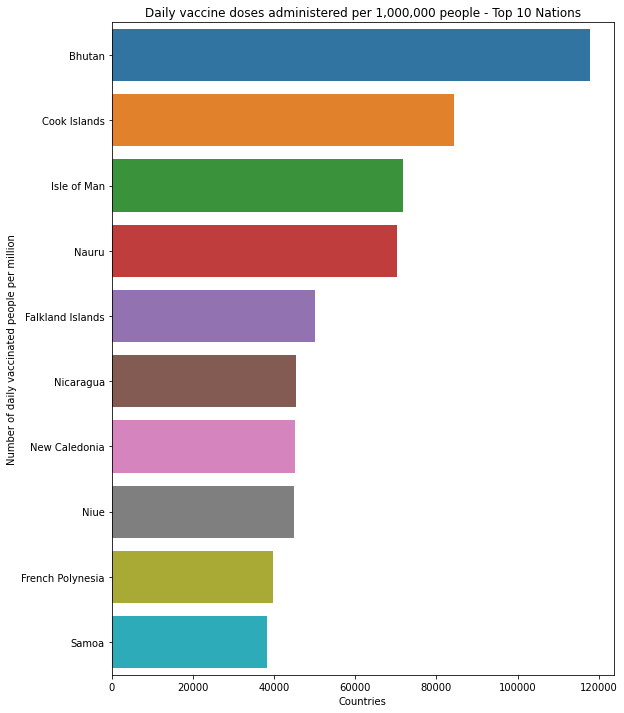

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations','daily_vaccinations_per_million']
vaccines_per_million = df5[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vaccines_per_million.reset_index(level=0, inplace=True)
vaccines_per_million = vaccines_per_million.sort_values('daily_vaccinations_per_million', ascending=False)
vaccines_per_million = vaccines_per_million.iloc[0:10]
vaccines_per_million.reset_index(level=0, inplace=True)

plt.figure(figsize=(9, 12))
sns.barplot(y=vaccines_per_million['location'], x=vaccines_per_million['daily_vaccinations_per_million'], orient='h')
plt.title('Daily vaccine doses administered per 1,000,000 people - Top 10 Nations', fontdict = { 'fontsize': 12})
plt.ylabel('Number of daily vaccinated people per million')
plt.xlabel('Countries')

Text(0.5, 0, 'Countries')

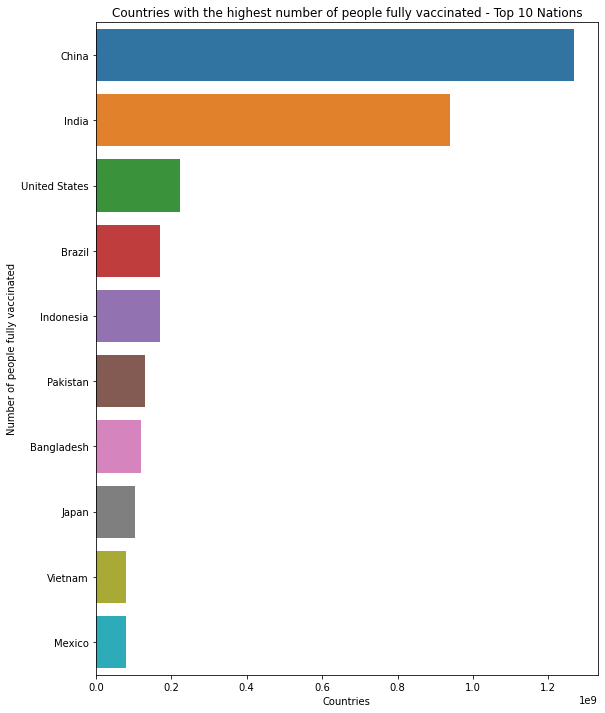

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations', 'people_vaccinated','people_fully_vaccinated']
people_fully_vaccinated = df5[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
people_fully_vaccinated.reset_index(level=0, inplace=True)
drop_rows = ['World', 'High income', 'North America', 'South America', 'Europe', 'European Union', 'Asia', 'Africa', 'Upper middle income', 'Lower middle income','Low income']

people_fully_vaccinated = people_fully_vaccinated[~people_fully_vaccinated['location'].isin(drop_rows)]


people_fully_vaccinated = people_fully_vaccinated.sort_values('people_fully_vaccinated', ascending=False)
people_fully_vaccinated = people_fully_vaccinated.iloc[0:10]
people_fully_vaccinated.reset_index(level=0, inplace=True)

plt.figure(figsize=(9, 12))
sns.barplot(y=people_fully_vaccinated['location'], x=people_fully_vaccinated['people_fully_vaccinated'], orient='h')

plt.title('Countries with the highest number of people fully vaccinated - Top 10 Nations', fontdict = { 'fontsize': 12})
plt.ylabel('Number of people fully vaccinated')
plt.xlabel('Countries')

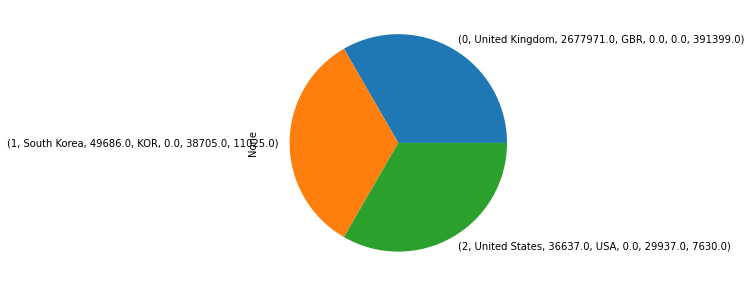

In [ ]:
cols = ['location', 'total_vaccinations', 'iso_code', 'daily_vaccinations', 'people_vaccinated','people_fully_vaccinated']
people_fully_vaccinated = df5[cols].groupby('location').min().sort_values('people_fully_vaccinated', ascending=False).dropna(subset=['people_fully_vaccinated'])
people_fully_vaccinated.reset_index(level=0, inplace=True)
drop_rows = ['World', 'High income', 'North America', 'South America', 'Europe', 'European Union', 'Asia', 'Africa', 'Upper middle income', 'Lower middle income','Low income', 'China']

people_fully_vaccinated = people_fully_vaccinated[~people_fully_vaccinated['location'].isin(drop_rows)]


people_fully_vaccinated = people_fully_vaccinated.sort_values('people_fully_vaccinated', ascending=False)
people_fully_vaccinated = people_fully_vaccinated.iloc[0:3]
people_fully_vaccinated.reset_index(level=0, inplace=True)
people_fully_vaccinated.value_counts().plot(kind='pie', figsize=(5,5))


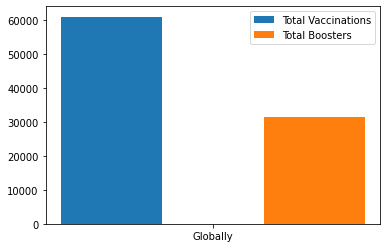

In [ ]:


Countries = ['Globally']
people_vaccinated_new = df2['total_vaccinations'].count()
people_fully_vaccinated_new = df2['total_boosters'].count()

x_axis = np.arange(len(Countries))



plt.bar(x_axis -0.2, people_vaccinated_new, width=0.2, label = 'Total Vaccinations')
plt.bar(x_axis +0.2, people_fully_vaccinated_new, width=0.2, label = 'Total Boosters')



plt.xticks(x_axis, Countries)



plt.legend()



plt.show()

In [ ]:
from skimage import io
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image
from sklearn import preprocessing

In [ ]:
array = df5.to_numpy()
array

array([['Afghanistan', 'AFG', '2021-02-22', ..., 0.0, 0.0, 0.0],
       ['Afghanistan', 'AFG', '2021-02-23', ..., 34.0, 1367.0, 0.003],
       ['Afghanistan', 'AFG', '2021-02-24', ..., 34.0, 1367.0, 0.003],
       ...,
       ['Zimbabwe', 'ZWE', '2022-07-29', ..., 329.0, 1950.0, 0.012],
       ['Zimbabwe', 'ZWE', '2022-07-30', ..., 350.0, 2130.0, 0.013],
       ['Zimbabwe', 'ZWE', '2022-07-31', ..., 310.0, 1954.0, 0.012]],
      dtype=object)

In [ ]:
labels = array[:, 4:5]
labels

array([[0.0],
       [0.0],
       [0.0],
       ...,
       [6372686.0],
       [6375973.0],
       [6376117.0]], dtype=object)

In [ ]:
dd2 = df5.iloc[: , :4].agg(['mean', 'std'])
dd2

,total_vaccinations
mean,1.269660e+08
std,7.704185e+08


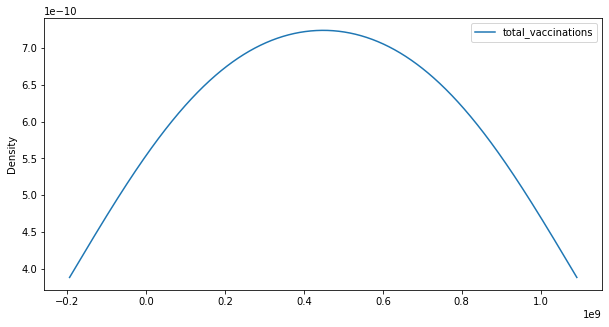

In [ ]:
x = dd2.plot(kind='density', figsize=(10,5))

In [ ]:
normalized=(df5-df5.mean())/df5.std()
normalized_df = normalized.fillna(0)
normalized_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,daily_people_vaccinated,daily_people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_raw,date,iso_code,location,people_fully_vaccinated,people_fully_vaccinated_per_hundred,people_vaccinated,people_vaccinated_per_hundred,total_boosters,total_boosters_per_hundred,total_vaccinations,total_vaccinations_per_hundred
0,-0.160835,-0.531057,-0.173658,-0.744764,-0.163724,0,0,0,-0.152469,-0.655960,-0.161208,-0.711977,-0.118413,-0.379383,-0.164801,-0.669468
1,-0.159447,-0.516970,-0.173091,-0.735390,-0.163724,0,0,0,-0.152469,-0.655960,-0.161208,-0.711977,-0.118413,-0.379383,-0.164801,-0.669468
2,-0.159447,-0.516970,-0.173091,-0.735390,-0.163724,0,0,0,-0.152469,-0.655960,-0.161208,-0.711977,-0.118413,-0.379383,-0.164801,-0.669468
3,-0.159447,-0.516970,-0.173091,-0.735390,-0.163724,0,0,0,-0.152469,-0.655960,-0.161208,-0.711977,-0.118413,-0.379383,-0.164801,-0.669468
4,-0.159447,-0.516970,-0.173091,-0.735390,-0.163724,0,0,0,-0.152469,-0.655960,-0.161208,-0.711977,-0.118413,-0.379383,-0.164801,-0.669468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121080,-0.158083,-0.451230,-0.169693,-0.579896,-0.159015,0,0,0,-0.137100,0.377011,-0.143217,0.573039,-0.107951,0.049335,-0.149006,0.375050
121081,-0.158680,-0.470013,-0.170695,-0.621526,-0.162071,0,0,0,-0.137095,0.377363,-0.143213,0.573361,-0.107941,0.049952,-0.149001,0.375325
121082,-0.158855,-0.474708,-0.171478,-0.654059,-0.162733,0,0,0,-0.137093,0.377363,-0.143211,0.573684,-0.107933,0.049952,-0.148998,0.375599
121083,-0.158672,-0.470013,-0.171336,-0.648269,-0.161514,0,0,0,-0.137091,0.377363,-0.143202,0.574329,-0.107919,0.050570,-0.148991,0.376011


In [ ]:
scaler = MinMaxScaler()

In [ ]:
final_df = pd.DataFrame(scaler.fit_transform(normalized_df), columns=normalized_df.columns, index=normalized_df.index) 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:147: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:149: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:150: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


ValueError: ignored

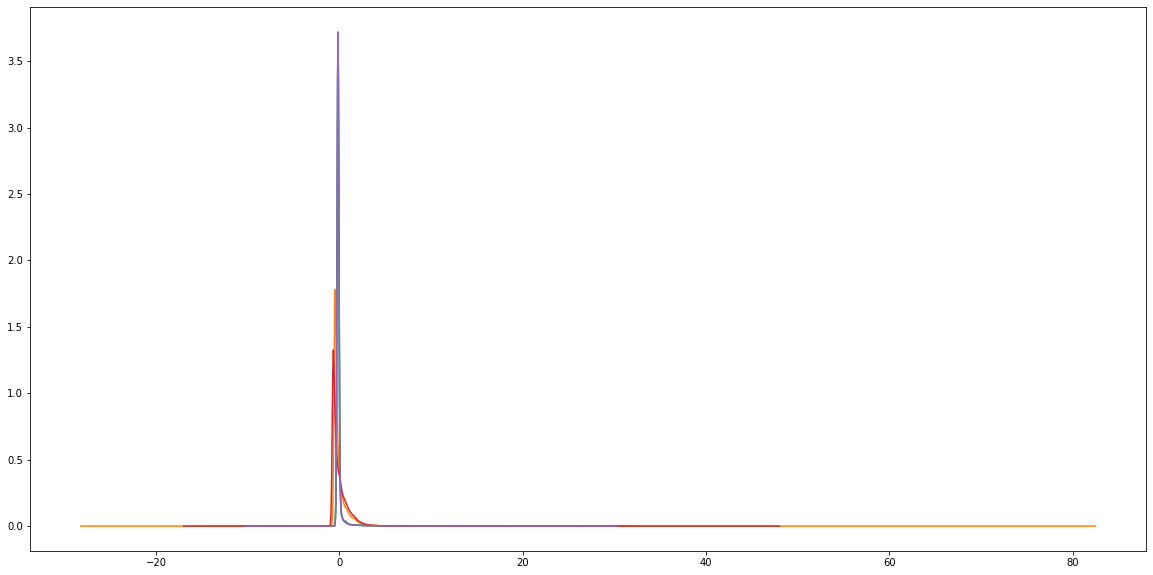

In [ ]:
x = normalized.plot(kind='density', figsize=(20,10)) 

In [ ]:
x = df5['people_fully_vaccinated']
y = df5['total_vaccinations']

In [ ]:
x_matrix = x.values.reshape(-1,1)

x_matrix.shape

(121085, 1)

In [ ]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

In [ ]:
data = pd.DataFrame(data=[12173026.0	,12175457.0	], columns=['total_vaccinations'])
data

,total_vaccinations
0,12173026.0
1,12175457.0


In [ ]:
reg.predict(data)

In [ ]:
data['predicted_people_fully_vaccinated'] = reg.predict(data)
data

ValueError: ignored

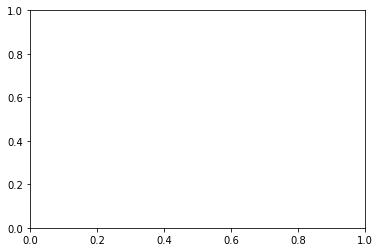

In [ ]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='red')
plt.xlabel('Fully Vaccinated')
plt.ylabel('Total Vaccinated')
plt.show()

In [ ]:
df7 = df
df7 = df7.fillna(0)
for i in ['location', 'iso_code' ]:

  dummies = pd.get_dummies(df7[i], drop_first=False)
  df7 = pd.concat([df7, dummies], axis=1)
  df7 = df7.drop(i, axis = 1)
  df7

In [ ]:
df7

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,VEN,VGB,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
0,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121080,2022-07-27,12168972.0,6370434.0,4688789.0,1109749.0,11550.0,9567.0,76.09,39.83,29.32,...,0,0,0,0,0,0,0,0,0,1
121081,2022-07-28,12173026.0,6371959.0,4690254.0,1110813.0,4054.0,7150.0,76.11,39.84,29.33,...,0,0,0,0,0,0,0,0,0,1
121082,2022-07-29,12175457.0,6372686.0,4691111.0,1111660.0,2431.0,5261.0,76.13,39.85,29.33,...,0,0,0,0,0,0,0,0,0,1
121083,2022-07-30,12180877.0,6375973.0,4691667.0,1113237.0,5420.0,5603.0,76.16,39.87,29.33,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_incoder = LabelEncoder()

df7.iloc[:, 0] = label_incoder.fit_transform(df7.iloc[:, 0])
df7.iloc[:, 5] = label_incoder.fit_transform(df7.iloc[:, 5])
df7

In [ ]:
from sklearn import preprocessing

In [ ]:
df7.iloc[:, :5] = preprocessing.scale(df7.iloc[:, :5])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [ ]:
df7

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,VEN,VGB,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
0,-1.623274,-0.164802,-0.161208,-0.152470,-0.118414,0,0.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,-1.616904,-0.164802,-0.161208,-0.152470,-0.118414,0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,-1.610535,-0.164802,-0.161208,-0.152470,-0.118414,0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,-1.604165,-0.164802,-0.161208,-0.152470,-0.118414,0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,-1.597795,-0.164802,-0.161208,-0.152470,-0.118414,0,1367.0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121080,1.688961,-0.149007,-0.143218,-0.137101,-0.107952,7525,9567.0,76.09,39.83,29.32,...,0,0,0,0,0,0,0,0,0,1
121081,1.695331,-0.149001,-0.143214,-0.137096,-0.107942,3507,7150.0,76.11,39.84,29.33,...,0,0,0,0,0,0,0,0,0,1
121082,1.701701,-0.148998,-0.143212,-0.137093,-0.107934,2278,5261.0,76.13,39.85,29.33,...,0,0,0,0,0,0,0,0,0,1
121083,1.708070,-0.148991,-0.143202,-0.137091,-0.107919,4408,5603.0,76.16,39.87,29.33,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df7.iloc[121070 : , :5 ]
x

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
121070,1.625264,-0.164802,-0.161208,-0.152470,-0.118414
121071,1.631634,-0.149118,-0.143290,-0.137221,-0.108176
121072,1.638004,-0.149112,-0.143282,-0.137217,-0.108165
121073,1.644373,-0.149094,-0.143272,-0.137200,-0.108120
121074,1.650743,-0.149066,-0.143256,-0.137168,-0.108066
121075,1.657113,-0.149046,-0.143250,-0.137130,-0.108046
121076,1.663483,-0.149042,-0.143244,-0.137128,-0.108044
121077,1.669852,-0.149034,-0.143241,-0.137122,-0.108013
121078,1.676222,-0.149027,-0.143236,-0.137116,-0.107998
121079,1.682592,-0.149022,-0.143231,-0.137113,-0.107983


In [ ]:
y = df7.iloc[121070 : , 5 ]
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=0)

In [ ]:
x_train

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
121079,1.682592,-0.149022,-0.143231,-0.137113,-0.107983
121084,1.714440,-0.148989,-0.143202,-0.137089,-0.107910
121074,1.650743,-0.149066,-0.143256,-0.137168,-0.108066
121072,1.638004,-0.149112,-0.143282,-0.137217,-0.108165
121083,1.708070,-0.148991,-0.143202,-0.137091,-0.107919
121080,1.688961,-0.149007,-0.143218,-0.137101,-0.107952
121077,1.669852,-0.149034,-0.143241,-0.137122,-0.108013
121081,1.695331,-0.149001,-0.143214,-0.137096,-0.107942
121073,1.644373,-0.149094,-0.143272,-0.137200,-0.108120
121070,1.625264,-0.164802,-0.161208,-0.152470,-0.118414


In [ ]:
y_train

121079     3787
121084     1742
121074    10829
121072     4291
121083     4408
121080     7525
121077     4979
121081     3507
121073     8448
121070        0
121075     9114
121082     2278
Name: daily_vaccinations_raw, dtype: int64

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
from sklearn import svm


SVM_classifier = svm.SVC(kernel='linear') 


SVM_classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = SVM_classifier.predict(x_test)

In [ ]:
y_test

121071       0
121076    2745
121078    4128
Name: daily_vaccinations_raw, dtype: int64

In [ ]:
y_pred

array([4291, 4979, 3787])

In [ ]:
from sklearn import metrics
print("The accuracy:",metrics.accuracy_score(y_test, y_pred))

The accuracy: 0.0


In [ ]:
print("The precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

The precision: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
        2745       0.00      0.00      0.00       1.0
        3787       0.00      0.00      0.00       0.0
        4128       0.00      0.00      0.00       1.0
        4291       0.00      0.00      0.00       0.0
        4979       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_classifier = GaussianNB()
y_pred = NB_classifier.fit(x_train, y_train).predict(x_test)

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
        2745       0.00      0.00      0.00       1.0
        3787       0.00      0.00      0.00       0.0
        4128       0.00      0.00      0.00       1.0
        4291       0.00      0.00      0.00       0.0
        9114       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier(n_estimators=100)
y_pred = RFC.fit(x_train, y_train).predict(x_test)


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
        2745       0.00      0.00      0.00       1.0
        4128       0.00      0.00      0.00       1.0
        4291       0.00      0.00      0.00       0.0
        4979       0.00      0.00      0.00       0.0
        9114       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
uploaded = files.upload()

Saving projectimg1.png to projectimg1 (1).png
Saving projectimg2.png to projectimg2 (1).png
Saving projectimg3.png to projectimg3 (1).png
Saving projectimg4.png to projectimg4 (1).png


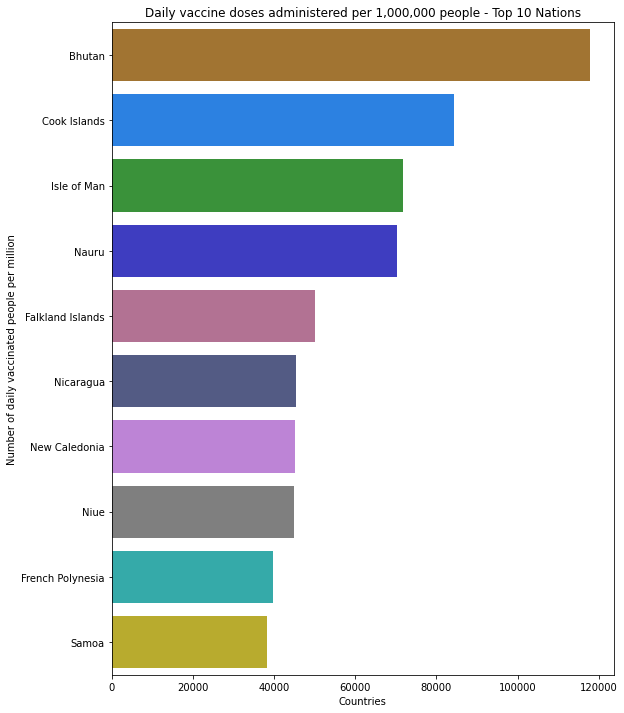

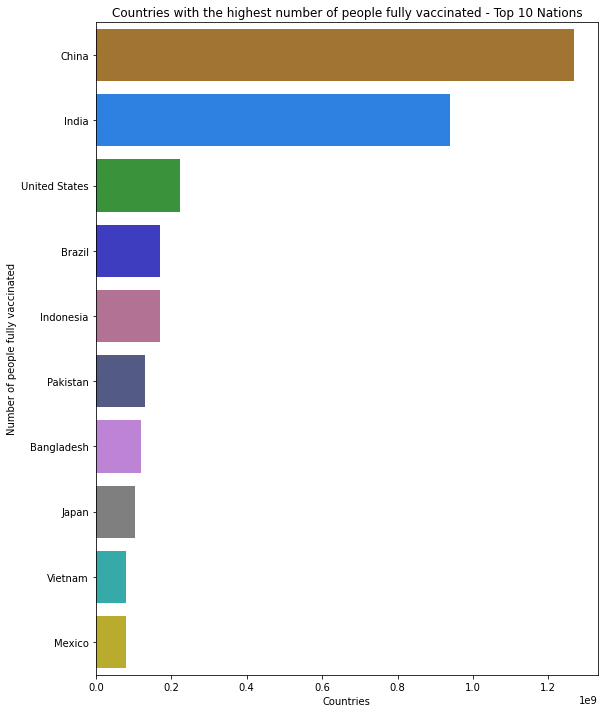

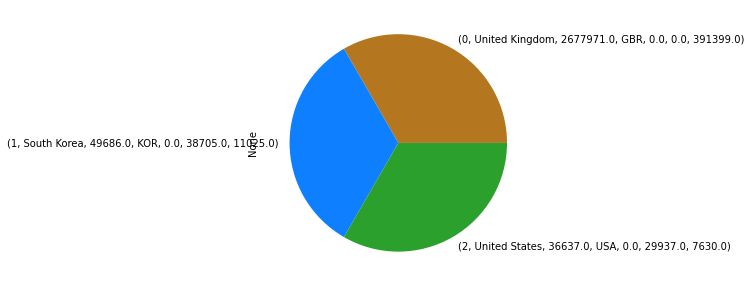

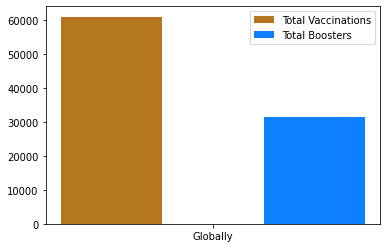

In [ ]:
urls = ["projectimg1.png","projectimg2.png","projectimg3.png","projectimg4.png"]  

for url in urls:
  image = io.imread(url) 
  
  
  cv2_imshow(image)
  print('\n')